In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/stacked_classified.csv')
df.shape

(1130, 20)

### basic k-means on all text
- follow steps in [this](https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52) article

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text_nourl'])

In [4]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [6]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

Cluster 0:
took
forget
hoping
away
lost
return
paradise
day
replace
able
Cluster 1:
california
chico
ca
paradise
feather
running
campfire
camp
rd
oroville
Cluster 2:
photographer
nature
flyinghorsedesigncom
naturephotography
pmgridchallenge
love
picoftheday
bio
link
instalike


In [7]:
print('')
print('Prediction')
X = vectorizer.transform(['Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball.'])
predicted = model.predict(X)
print(predicted)


Prediction
[1]


### basic k-means on fire text
- follow steps in [this](https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52) article

In [8]:
df.columns

Index(['tweet_count', 'City', 'id', 'tweet_text', 'timestamp', 'hashtags',
       'username', 'mentions', 'rewtweets', 'replies', 'link', 'day', 'hour',
       'minute', 'during_fire', 'is-fire-related', 'text_nourl', 'key_score',
       'from_locations', 'sent'],
      dtype='object')

In [9]:
fire = df[(df['is-fire-related'] == 1)]
fire.shape

(616, 20)

In [10]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(fire['text_nourl'])

true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [12]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

Cluster 0:
rd
traffic
closure
ca
nb
sb
camp
89
hwy
70
Cluster 1:
california
campfire
chico
paradise
ca
buttecounty
000
acres
camp
contained
Cluster 2:
took
forget
hoping
away
return
lost
day
replace
able
paradise


In [13]:
# 3 clusters
# cluster 0: information-related
# cluster 1: traffic-related
# cluster 2: emotional

In [14]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [16]:
for i in range(true_k):
    print(f'Cluster %d:' % i),
    for ind in order_centroids[i, :10]:
        print(f'%s' % terms[ind])

Cluster 0:
rd
traffic
closure
ca
nb
sb
camp
89
hwy
70
Cluster 1:
california
paradise
campfire
people
camp
help
family
today
butte
county
Cluster 2:
chico
california
campfire
posted
just
paradise
photo
calfire
church
wildfire
Cluster 3:
took
forget
hoping
away
return
lost
day
replace
able
paradise
Cluster 4:
ca
info
unofficial
disclaimers
incorrect
officials
safety
images
sacramento
update


In [17]:
# 5 clusters:
# 0: photo 
# 1: emotional (negative sentiment)
# 2: traffic
# 3: information
# 4: emotional (positive sentiment)

In [18]:
print('Prediction')
X = vectorizer.transform(['Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball.'])
predicted = model.predict(X)
print(predicted)

Prediction
[1]


In [33]:
fire['cluster'] = fire['text_nourl'].map(lambda x: model.predict(vectorizer.transform(x)))
fire.head()

ValueError: Iterable over raw text documents expected, string object received.

### chart k-means

In [19]:
df['key_score'].sort_values(ascending=False)

787     5
994     5
1000    5
85      5
716     5
       ..
638     0
637     0
634     0
633     0
564     0
Name: key_score, Length: 1130, dtype: int64

In [20]:
df.columns

Index(['tweet_count', 'City', 'id', 'tweet_text', 'timestamp', 'hashtags',
       'username', 'mentions', 'rewtweets', 'replies', 'link', 'day', 'hour',
       'minute', 'during_fire', 'is-fire-related', 'text_nourl', 'key_score',
       'from_locations', 'sent'],
      dtype='object')

In [21]:
df['from_locations'].value_counts()

Chico, CA              487
Paradise, CA           419
Oroville, CA            71
Butte County            46
Magalia, CA             17
Gridley, CA             14
South Oroville, CA      13
Sacramento, CA          13
Durham, CA               7
Thermalito, CA           5
Folsom, CA               4
Reno, NV                 3
Oroville East, CA        3
Carson City, NV          3
Rocklin, CA              2
Redding, CA              2
Lodi, CA                 2
Nevada City, CA          2
Napa, CA                 2
Sebastopol, CA           2
nolocationfound          2
Carmichael, CA           1
St Helena, CA            1
Carnelian Bay, CA        1
Truckee, CA              1
Glen Ellen, CA           1
Florin, CA               1
Sonoma, CA               1
Linda, CA                1
Yountville, CA           1
Lincoln, CA              1
Incline Village, NV      1
Name: from_locations, dtype: int64

In [22]:
df['locs_no'] = df['from_locations']
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,...,day,hour,minute,during_fire,is-fire-related,text_nourl,key_score,from_locations,sent,locs_no
0,366.0,"Paradise, CA",1.060000e+18,"::paradise baby:: meet JD, the grandson of my ...",2018-11-16 16:31:06+00:00,#campfire,trekcass,@JulieRems,0,0,...,16,16,31,1,1,"::paradise baby:: meet JD, the grandson of my ...",2,"Paradise, CA",1,"Paradise, CA"
1,700.0,"Paradise, CA",1.060000e+18,"¡Coño! #CampFire @Chico, California https://ww...",2018-11-09 19:29:06+00:00,#CampFire,VXO,NaN,0,0,...,9,19,29,1,1,"¡Coño! #CampFire @Chico, California",1,"Chico, CA",1,"Chico, CA"
2,494.0,"Paradise, CA",1.060000e+18,. . . . . #photography #instapics #photographe...,2018-11-13 15:51:31+00:00,#photography #instapics #photographersofig #pi...,sidewayseightp,NaN,0,0,...,13,15,51,1,0,. . . . . #photography #instapics #photographe...,0,"Chico, CA",1,"Chico, CA"
3,53.0,"Paradise, CA",1.070000e+18,.@Stucam7771 nailed it! The man in the White H...,2018-11-24 11:29:40+00:00,NaN,XLComedy,@stucam7771,1,0,...,24,11,29,1,1,.@Stucam7771 nailed it! The man in the White H...,0,"Paradise, CA",1,"Paradise, CA"
4,201.0,"Oroville, CA",1.060000e+18,‘Merurica... #voted #uklastudios #uklapictures...,2018-11-07 02:02:51+00:00,#voted #uklastudios #uklapictures,UKLA_Music,NaN,0,0,...,7,2,2,0,0,‘Merurica... #voted #uklastudios #uklapictures...,0,"Gridley, CA",1,"Gridley, CA"


In [23]:
df['from_locations'].unique()

array(['Paradise, CA', 'Chico, CA', 'Gridley, CA', 'Oroville, CA',
       'nolocationfound', 'Magalia, CA', 'South Oroville, CA',
       'Durham, CA', 'Nevada City, CA', 'Sacramento, CA', 'Reno, NV',
       'Carson City, NV', 'Butte County', 'Folsom, CA', 'Sebastopol, CA',
       'Napa, CA', 'Carnelian Bay, CA', 'Sonoma, CA', 'Lodi, CA',
       'Carmichael, CA', 'Rocklin, CA', 'Redding, CA', 'Thermalito, CA',
       'Florin, CA', 'Linda, CA', 'Truckee, CA', 'Glen Ellen, CA',
       'St Helena, CA', 'Yountville, CA', 'Lincoln, CA',
       'Oroville East, CA', 'Incline Village, NV'], dtype=object)

In [24]:
all_cities = ['Chico, CA', 'California, USA', 'Sacramento, CA', 'Reno, NV',
       'Rocklin, CA', 'Folsom, CA', 'Oroville, CA', 'Florin, CA',
       'Nevada City, CA', 'Yountville, CA', 'Redding, CA', 'Linda, CA',
       'Magalia, CA', 'Paradise, CA', 'nolocationfound', 'Durham, CA',
       'Napa, CA', 'Glen Ellen, CA', 'Oroville East, CA',
       'South Oroville, CA', 'Thermalito, CA', 'Gridley, CA']

butte_cty = ['Chico, CA',  'Oroville, CA', 'Magalia, CA', 'Paradise, CA',  
             'Durham, CA', 'Oroville East, CA', 'South Oroville, CA', 
             'Thermalito, CA', 'Gridley, CA']

not_butte = ['California, USA', 'Sacramento, CA', 'Reno, NV','Rocklin, CA', 
             'Folsom, CA', 'Florin, CA','Nevada City, CA', 'Yountville, CA', 
             'Redding, CA', 'Linda, CA', 'nolocationfound', 'Napa, CA', 
             'Glen Ellen, CA',]

In [25]:
df['locs_no'] = df['locs_no'].replace(['Chico, CA',  'Oroville, CA', 'Magalia, CA', 'Paradise, CA',  
             'Durham, CA', 'Oroville East, CA', 'South Oroville, CA', 
             'Thermalito, CA', 'Gridley, CA'], 1)

In [26]:
df['locs_no'] = df['locs_no'].replace(['California, USA', 'Sacramento, CA', 'Reno, NV','Rocklin, CA', 
             'Folsom, CA', 'Florin, CA','Nevada City, CA', 'Yountville, CA', 
             'Redding, CA', 'Linda, CA', 'nolocationfound', 'Napa, CA', 
             'Glen Ellen, CA',], 0)

In [27]:
df.head()

,tweet_count,City,id,tweet_text,timestamp,hashtags,username,mentions,rewtweets,replies,...,day,hour,minute,during_fire,is-fire-related,text_nourl,key_score,from_locations,sent,locs_no
0,366.0,"Paradise, CA",1.060000e+18,"::paradise baby:: meet JD, the grandson of my ...",2018-11-16 16:31:06+00:00,#campfire,trekcass,@JulieRems,0,0,...,16,16,31,1,1,"::paradise baby:: meet JD, the grandson of my ...",2,"Paradise, CA",1,1
1,700.0,"Paradise, CA",1.060000e+18,"¡Coño! #CampFire @Chico, California https://ww...",2018-11-09 19:29:06+00:00,#CampFire,VXO,NaN,0,0,...,9,19,29,1,1,"¡Coño! #CampFire @Chico, California",1,"Chico, CA",1,1
2,494.0,"Paradise, CA",1.060000e+18,. . . . . #photography #instapics #photographe...,2018-11-13 15:51:31+00:00,#photography #instapics #photographersofig #pi...,sidewayseightp,NaN,0,0,...,13,15,51,1,0,. . . . . #photography #instapics #photographe...,0,"Chico, CA",1,1
3,53.0,"Paradise, CA",1.070000e+18,.@Stucam7771 nailed it! The man in the White H...,2018-11-24 11:29:40+00:00,NaN,XLComedy,@stucam7771,1,0,...,24,11,29,1,1,.@Stucam7771 nailed it! The man in the White H...,0,"Paradise, CA",1,1
4,201.0,"Oroville, CA",1.060000e+18,‘Merurica... #voted #uklastudios #uklapictures...,2018-11-07 02:02:51+00:00,#voted #uklastudios #uklapictures,UKLA_Music,NaN,0,0,...,7,2,2,0,0,‘Merurica... #voted #uklastudios #uklapictures...,0,"Gridley, CA",1,1


In [28]:
df_cluster = df[['key_score', 'locs_no']]

ValueError: could not convert string to float: 'Carson City, NV'

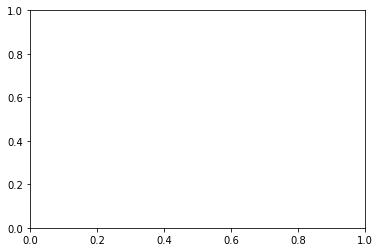

In [29]:
plt.scatter(x=df_cluster['key_score'],
            y=df_cluster['locs_no'],
            c='b');

plt.xlabel("$X_1$", fontsize=18);
plt.ylabel("$X_2$", fontsize=18);

In [ ]:
df['timestamp'].sort_values()

In [ ]:
df.sort_values(by='timestamp')

In [ ]:
cities = pd.read_csv('./datasets/cities_clean.csv')

In [ ]:
cities.sort_values(by='timestamp')

In [ ]:
cities.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 

In [ ]:
cities.shape

In [ ]:
cities.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 
cities.shape

In [ ]:
cities.dtypes

In [ ]:
cities['timestamp'] = pd.to_datetime(cities['timestamp'])

In [ ]:
cities.dtypes

In [ ]:
plt.hist(cities['timestamp'])

In [ ]:
import datetime

In [ ]:
cities.shape

In [ ]:
cities.columns

In [ ]:
df.head()

In [ ]:
df.drop_duplicates(subset ="id", 
                     keep = 'first', inplace = True) 
df.head()

In [ ]:
df.shape

In [ ]:
import chart_studio.plotly as py 
import plotly.graph_objs as go 
import plotly.express as px

In [ ]:
# Simple line graph of apple high prices
fig = px.line(df, # data
             x = 'timestamp', # date for x-axis
             y = 'key_score' ) # plot close price
fig.show()

In [ ]:
df.columns

In [ ]:
df.from_locations.value_counts()

In [ ]:
pd.set_option('display.max_rows', 500) #display max rows
df[(df.from_locations == 'California, USA')] 